# Introduction
- This notebook is intended to explore the dataset of listed COMAH sites in the UK as of March 2020.<br>
- The dataset is a CSV file of all UK COMAH sites, including the company name and address.<br>
- The dataset was aquired through the HSE: http://www.hse.gov.uk/comah/comah-establishments.htm

# Read in raw data
- First we import the modules required for this analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def top_value_counts(x,top_n=5):
    v_cs = list((100*round(x.value_counts(normalize=True),2)).apply(int))
    l = len(v_cs)
    v_cs = list(map(str,v_cs))
    v_cs = ','.join(v_cs) if l<=top_n else ','.join(v_cs[:top_n]+['..'])
    return v_cs

def custom_dsc(df,samples=1): #Add columns to the df to allow us to see explore the data (high level).
    df_dsc = pd.DataFrame(data=[],index=df.columns)
    for col in df.columns:
        df_dsc.loc[col,'hasnas'] = df[col].hasnans
        df_dsc.loc[col,'dtype'] = df[col].dtypes
        df_dsc.loc[col,'count'] = df[col].count()
        df_dsc.loc[col,'nans'] = df[col].isna().sum()
        df_dsc.loc[col,'nunique_%']=round(df[col].nunique()/df[col].count(),2)
        df_dsc.loc[col,'nunique']=df[col].nunique()
        
        df_dsc.loc[col,'top val cs'] = top_value_counts(df[col])
            
        for n in range(samples):
            df_dsc.loc[col,'sample'+str(n+1)]=df[col].dropna().sample(n=1).values
    print("Shape:",df.shape)
    return df_dsc.convert_dtypes()

In [3]:
directory = r'C:\Users\Jbuck.ad\Documents\internal projects\COMAH'
file = 'COMAH UPPER and LOWER Tier Establishment List @ March 2020.csv'
path = os.path.join(directory,file)
df = pd.read_csv(path)

- We display information about each of the columns

In [4]:
df_dsc = custom_dsc(df,4)
df_dsc

Shape: (871, 13)


,hasnas,dtype,count,nans,nunique_%,nunique,top val cs,sample1,sample2,sample3,sample4
Operator Name,False,object,871,0,0.58,506,"3,3,2,2,1,..",Nu-Pro Limited,Hook 2 Sisters Limited,AWE Plc,Flogas Britain Limited trading as MacGas
Location Name,False,object,871,0,0.84,730,"1,1,1,1,1,..",Haverhill,Wirral,Stallingborough,Walthamstow (Coppermill Lane)
Address Name,True,object,565,306,0.96,541,"1,1,1,1,0,..",Glazebury Depot,Back Lane,Manchester Calor Centre,Houstoun Industrial Estate
Address Street,True,object,741,130,0.90,668,"1,1,1,1,1,..",Portslade,"Huntsman Drive, Irlam",Oakley Green,Markham Vale
Address Town,True,object,869,2,0.57,496,"2,2,2,2,1,..",Cramlington,"Hedon, Hull",Northwich,Manchester
Address County,False,object,871,0,0.22,194,"5,3,3,2,2,..",Invernesshire,Greater Manchester,West Midlands,Essex
Address Postcode 1,True,object,870,1,0.64,561,"2,1,1,1,1,..",CB22,M17,L20,SO21
Address Postcode 2,True,object,870,1,0.82,717,"1,1,1,0,0,..",1QW,4SA,6DA,1BT
Incumbent Duty Type Text,False,object,871,0,0.00,3,"59,41,0",COMAH Upper Tier Operator,COMAH Lower Tier Operator,COMAH Upper Tier Operator,COMAH Upper Tier Operator
Previous Name,True,object,310,561,0.63,196,"6,4,3,3,2,..",(was Grosvenor Chemicals Limited),(was Pentagon Fine Chemicals Ltd),(was GlaxoSmithKline PLC),(was Beam Global UK Ltd)


- We display the top 5 rows

In [5]:
df.head()

,Operator Name,Location Name,Address Name,Address Street,Address Town,Address County,Address Postcode 1,Address Postcode 2,Incumbent Duty Type Text,Previous Name,LA Code,Local Authority,Country
0,Anglian Water Services Limited,Wing Water Treatment Works,NaN,Morcott Road,Oakham,Rutland,LE15,8SA,COMAH Upper Tier Operator,NaN,2470.0,Rutland UA,England
1,Arch Timber Protection Limited,Huddersfield,Huddersfield Works,Leeds Road,Huddersfield,West Yorkshire,HD2,1YU,COMAH Upper Tier Operator,(was Arch UK Biocides Ltd),4715.0,Kirklees,England
2,Argenta Dundee Limited,Dundee,Dunsinane Industrial Estate,Kinnoull Road,Dundee,Angus,DD2,3XR,COMAH Upper Tier Operator,(was Vericore Limited),9059.0,Dundee UA,Scotland
3,Associated British Ports,Immingham Dock,Immingham Dock,NaN,Immingham,Lincolnshire,DN40,2NS,COMAH Upper Tier Operator,NaN,2002.0,North East Lincolnshire,England
4,Associated Petroleum Terminals (Immingham) Lim...,Immingham,Main Terminal,Queens Road,Immingham,North East Lincolnshire,DN40,2PN,COMAH Upper Tier Operator,NaN,2002.0,North East Lincolnshire,England


- We now bring in the longitude - latitude data for UK postcodes

In [6]:
file = "ukpostcodes.csv"
path = os.path.join(directory,file)
df_pc = pd.read_csv(path)

- We display information about each of the columns

In [7]:
custom_dsc(df_pc,5)

Shape: (1766510, 4)


,hasnas,dtype,count,nans,nunique_%,nunique,top val cs,sample1,sample2,sample3,sample4,sample5
id,False,int64,1766510,0,1.00,1766510,"0,0,0,0,0,..",2606434.000000,145449.000000,1115330.000000,890419.000000,741747.000000
postcode,False,object,1766510,0,1.00,1766510,"0,0,0,0,0,..",AL10 8HF,N1 5RU,KT13 0AD,SK1 3GE,G73 1NP
latitude,True,float64,1766428,82,0.95,1681044,"1,0,0,0,0,..",52.714105,54.693294,57.190961,51.829686,50.896393
longitude,True,float64,1766428,82,0.95,1681360,"1,0,0,0,0,..",-1.227614,1.308900,-1.308248,-5.053043,-2.192164


- We drop the ID column and remove rows with no longitudes or latitude

In [8]:
df_pc = df_pc.drop(columns=['id']).dropna()

- We display the top 5 rows

In [9]:
df_pc.head()

,postcode,latitude,longitude
0,AB10 1XG,57.144165,-2.114848
1,AB10 6RN,57.137880,-2.121487
2,AB10 7JB,57.124274,-2.127190
3,AB11 5QN,57.142701,-2.093295
4,AB11 6UL,57.137547,-2.112233


# Basic exploration

Text(0.5, 0, 'count')

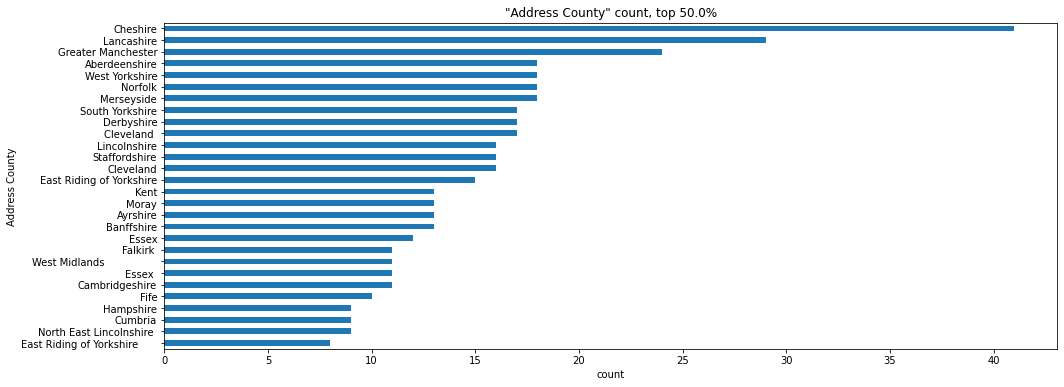

In [10]:
col = 'Address County'
top_pct = 0.5

df_AC = pd.concat([df[[col]].value_counts(),
                   df[[col]].value_counts(normalize=True)],axis=1).reset_index().rename(columns={0:'freq',1:'pct'}).set_index(col)
df_AC[df_AC['pct'].cumsum()<=top_pct]['freq'].sort_values(ascending=True).plot(kind='barh',figsize=(16,6))
plt.title('"'+col+'" count, top '+str(100*top_pct)+'%')
plt.xlabel('count')

Text(0.5, 0, 'count')

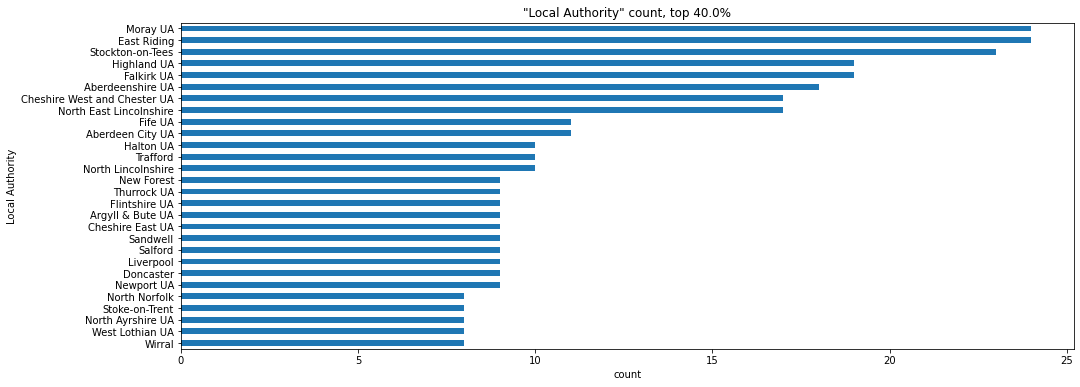

In [11]:
col = 'Local Authority'
top_pct = 0.4
df_AC = pd.concat([df[[col]].value_counts(),
                   df[[col]].value_counts(normalize=True)],axis=1).reset_index().rename(columns={0:'freq',1:'pct'}).set_index(col)
df_AC[df_AC['pct'].cumsum()<=top_pct]['freq'].sort_values(ascending=True).plot(kind='barh',figsize=(16,6))
plt.title('"'+col+'" count, top '+str(100*top_pct)+'%')
plt.xlabel('count')

Text(0.5, 0, 'count')

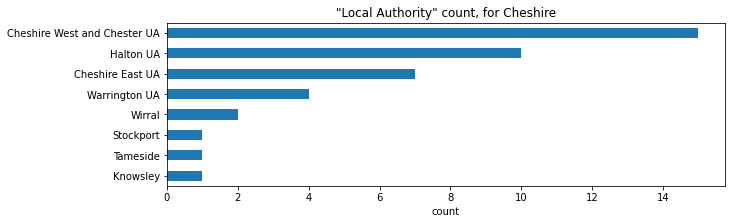

In [12]:
df[df['Address County']=='Cheshire']['Local Authority'].value_counts().sort_values().plot(kind='barh',figsize=(10,3))
plt.title('"Local Authority" count, for Cheshire')
plt.xlabel('count')

# Join data

- First we create a 'postcode column' and remove whitespace on both df's

In [13]:
df['postcode'] = df['Address Postcode 1']+df['Address Postcode 2']
df['postcode'] = df['postcode'].str.replace(" ","")
df = df.drop(columns=['Address Postcode 1','Address Postcode 2'])

df_pc['postcode'] = df_pc['postcode'].str.replace(" ","")

df = pd.merge(df,df_pc,how='left',on='postcode')

In [14]:
df.head()

,Operator Name,Location Name,Address Name,Address Street,Address Town,Address County,Incumbent Duty Type Text,Previous Name,LA Code,Local Authority,Country,postcode,latitude,longitude
0,Anglian Water Services Limited,Wing Water Treatment Works,NaN,Morcott Road,Oakham,Rutland,COMAH Upper Tier Operator,NaN,2470.0,Rutland UA,England,LE158SA,52.616952,-0.679148
1,Arch Timber Protection Limited,Huddersfield,Huddersfield Works,Leeds Road,Huddersfield,West Yorkshire,COMAH Upper Tier Operator,(was Arch UK Biocides Ltd),4715.0,Kirklees,England,HD21YU,53.662959,-1.755167
2,Argenta Dundee Limited,Dundee,Dunsinane Industrial Estate,Kinnoull Road,Dundee,Angus,COMAH Upper Tier Operator,(was Vericore Limited),9059.0,Dundee UA,Scotland,DD23XR,56.481057,-3.009501
3,Associated British Ports,Immingham Dock,Immingham Dock,NaN,Immingham,Lincolnshire,COMAH Upper Tier Operator,NaN,2002.0,North East Lincolnshire,England,DN402NS,NaN,NaN
4,Associated Petroleum Terminals (Immingham) Lim...,Immingham,Main Terminal,Queens Road,Immingham,North East Lincolnshire,COMAH Upper Tier Operator,NaN,2002.0,North East Lincolnshire,England,DN402PN,53.622203,-0.174614


In [15]:
# df_sites = df_sites.rename(columns={'Operator Name':'name',
#                          0:'postcode',
#                         'Incumbent Duty Type Text':'type'})

- Show number of sites without Latitude Longitude (no match on postcode)

In [16]:
df[df[['latitude','longitude']].isna().any(axis=1)].shape[0]

71

In [17]:
df_r = df.dropna(subset=['latitude','longitude']).drop(columns=['Address Name','Address Street','Address Town','Address County','Previous Name','LA Code'])

df_r = df_r.rename(columns={'Incumbent Duty Type Text':'COMAH type'})
df_r

,Operator Name,Location Name,COMAH type,Local Authority,Country,postcode,latitude,longitude
0,Anglian Water Services Limited,Wing Water Treatment Works,COMAH Upper Tier Operator,Rutland UA,England,LE158SA,52.616952,-0.679148
1,Arch Timber Protection Limited,Huddersfield,COMAH Upper Tier Operator,Kirklees,England,HD21YU,53.662959,-1.755167
2,Argenta Dundee Limited,Dundee,COMAH Upper Tier Operator,Dundee UA,Scotland,DD23XR,56.481057,-3.009501
4,Associated Petroleum Terminals (Immingham) Lim...,Immingham,COMAH Upper Tier Operator,North East Lincolnshire,England,DN402PN,53.622203,-0.174614
5,Avanti Gas Limited,Ellesmere Port,COMAH Upper Tier Operator,Wirral,England,CH654HB,53.286351,-2.912845
...,...,...,...,...,...,...,...,...
866,World Fuel Services Aviation Limited,Birmingham Airport Joint Airport Storage,COMAH Lower Tier Operator,Solihull,England,B263QY,52.447709,-1.735881
867,XPO Supply Chain UK Limited,"Bromford Gate, Birmingham",COMAH Lower Tier Operator,Birmingham,England,B248DW,52.507428,-1.834192
868,XPO Supply Chain UK Limited,Goole,COMAH Lower Tier Operator,East Riding,England,DN146XL,53.704553,-0.900385
869,XPO Supply Chain UK Limited,Stowmarket,COMAH Lower Tier Operator,Mid Suffolk,England,IP142QU,52.179198,1.010182


In [19]:
df_r.to_csv('comah_sites_long_lat.csv')

In [30]:
df_r['Operator Name'][df_r['Operator Name'].str.lower().str.contains('limited')].sample(10)

115                    Falmouth Petroleum Limited
823                             TS Resins Limited
654                         J T Grosvenor Limited
775                        Sharpness Dock Limited
261                Saltend Chemicals Park Limited
464                             Calor Gas Limited
61           CLH Pipeline System (CLH-PS) Limited
110                     Exwold Technology Limited
252    Redcliffe International (Shipping) Limited
830                United Utilities Water Limited
Name: Operator Name, dtype: object

### Now we convert our latitude and longitude data into x y co-ordinates. This is to make the geospatial data more interperatable

In [178]:
R=6371 #Earth km
df_r['x'] = df_r[['latitude','longitude']].apply(lambda x: R*m.cos((m.pi/180)*x['latitude'])*m.cos((m.pi/180)*x['longitude']),axis=1)
df_r['y'] = df_r[['latitude','longitude']].apply(lambda x: R*m.cos((m.pi/180)*x['latitude'])*m.sin((m.pi/180)*x['longitude']),axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

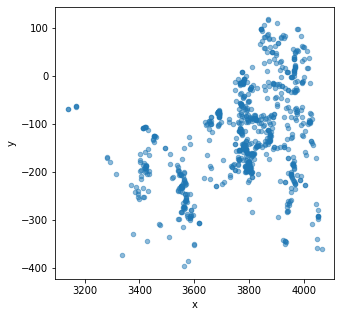

In [179]:
df_r[['x','y']].plot(kind='scatter',x='x',y='y',figsize=(5,5),alpha=0.5)

### We need to rotate our x,y co-ordinates

In [180]:
def rotate_xy(row,theta):
    x,y = row['x'],row['y']
    x_n = x*m.cos((m.pi/180)*theta) - y*m.sin((m.pi/180)*theta)
    y_n = y*m.cos((m.pi/180)*theta) + x*m.sin((m.pi/180)*theta)
    return [x_n,y_n]

<AxesSubplot:title={'center':'COMAH Sites in x,y coords'}, xlabel='x', ylabel='y'>

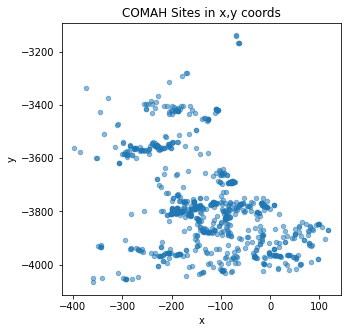

In [181]:
df_r_n = pd.DataFrame(df_r[['x','y']].apply(rotate_xy,theta=-90,axis=1).to_list(),columns=['x','y'])
df_r_n.plot(kind='scatter',x='x',y='y',figsize=(5,5),alpha=0.5,title='COMAH Sites in x,y coords')

<AxesSubplot:title={'center':'COMAH Sites in x,y coords'}, xlabel='x', ylabel='y'>

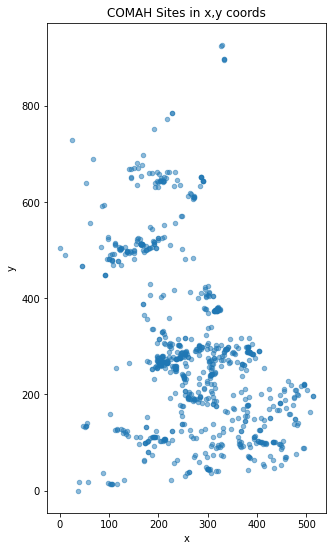

In [182]:
df_r_n['x'] = df_r_n['x']-df_r_n['x'].min()
df_r_n['y'] = df_r_n['y']-df_r_n['y'].min()

x_size = 5
y_size = x_size * df_r_n['y'].max()/df_r_n['x'].max()
df_r_n.plot(kind='scatter',x='x',y='y',figsize=(x_size,y_size),alpha=0.5,title='COMAH Sites in x,y coords')

### Clustering

In [183]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

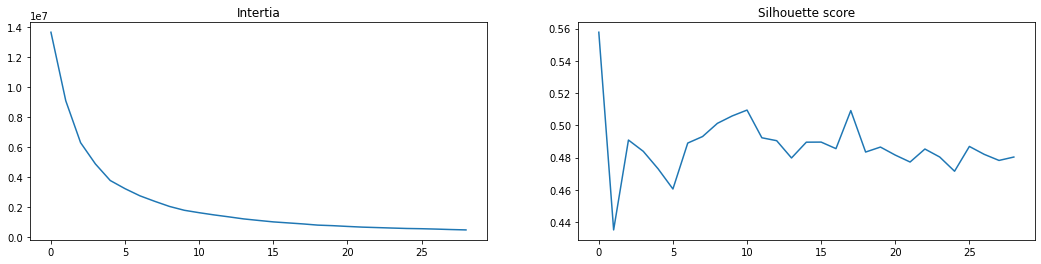

In [243]:
i_score=[]
s_score=[]
for n in range(2,31):
    km = KMeans(n_clusters=n)
    km.fit(df_r_n)
    s_score.append(silhouette_score(df_r_n,km.labels_))
    i_score.append(km.inertia_)
    
fig,ax = plt.subplots(1,2,figsize=(18,4))
ax[0].set_title('Intertia')
ax[0].plot(i_score)
ax[1].set_title('Silhouette score')
ax[1].plot(s_score)
plt.show()

In [472]:
km = KMeans(n_clusters=10)
km.fit(df_r_n)
labels = km.labels_
df_c = pd.concat([df_r_n,pd.Series(labels,name='label')],axis=1)

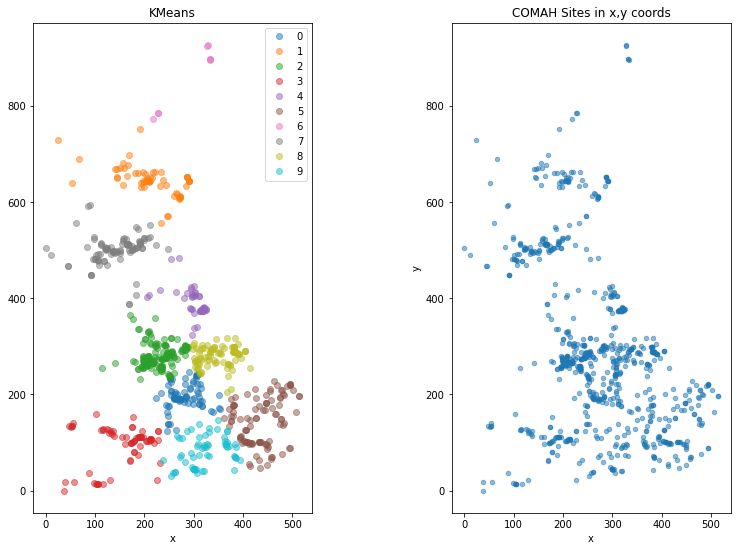

In [473]:
fig,ax = plt.subplots(1,2,figsize=(x_size,y_size))
for n,g in df_c.groupby('label'):
    g.plot(marker='o',linestyle='',alpha=0.5,x='x',y='y',label=n,ax=ax[0])
ax[0].legend()
ax[0].set_title('KMeans')
df_r_n.plot(kind='scatter',x='x',y='y',figsize=(x_size*2.5,y_size),alpha=0.5,title='COMAH Sites in x,y coords',ax=ax[1])
plt.subplots_adjust(wspace=0.5)

In [251]:
from sklearn.cluster import DBSCAN

In [474]:
dbs = DBSCAN(eps=25,min_samples=10,metric='euclidean')
# dbs = DBSCAN(eps=0.0001,min_samples=10,metric='cosine')
dbs.fit(df_r_n)
labels = dbs.labels_
df_c = pd.concat([df_r_n,pd.Series(labels,name='label')],axis=1)

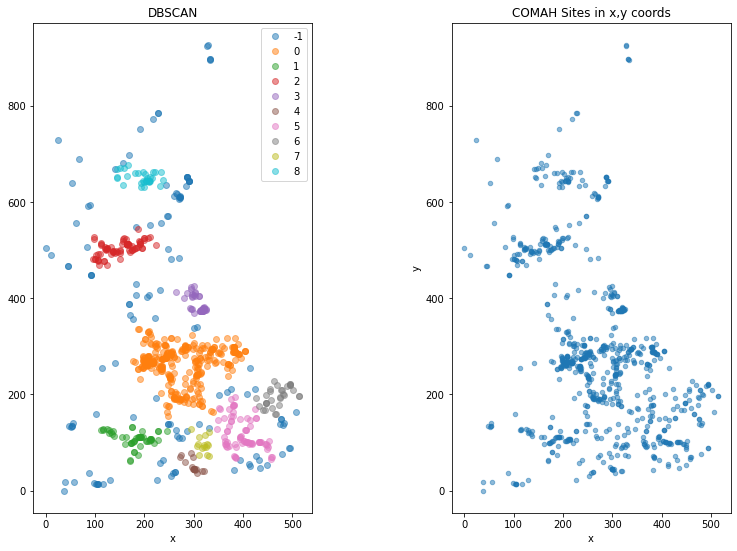

In [475]:
fig,ax = plt.subplots(1,2,figsize=(x_size,y_size))
for n,g in df_c.groupby('label'):
    g.plot(marker='o',linestyle='',alpha=0.5,x='x',y='y',label=n,ax=ax[0])
ax[0].legend()
ax[0].set_title('DBSCAN')
df_r_n.plot(kind='scatter',x='x',y='y',figsize=(x_size*2.5,y_size),alpha=0.5,title='COMAH Sites in x,y coords',ax=ax[1])
plt.subplots_adjust(wspace=0.5)

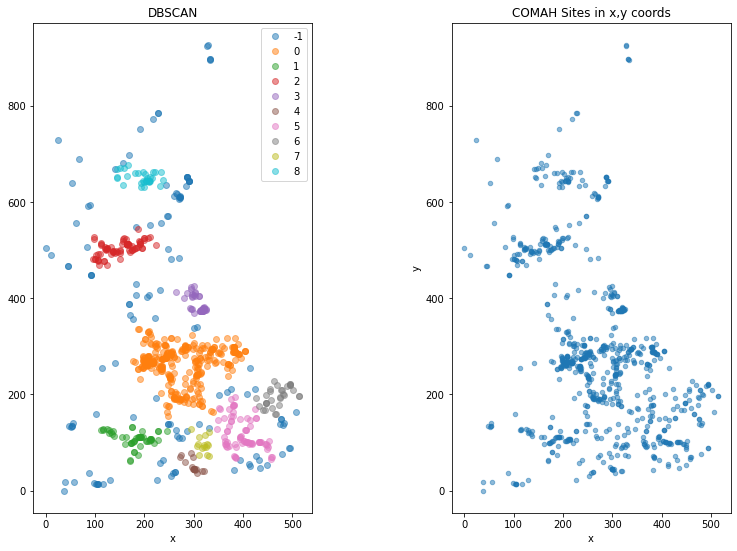

In [476]:
fig,ax = plt.subplots(1,2,figsize=(x_size,y_size))
for n,g in df_c.groupby('label'):
    g.plot(marker='o',linestyle='',alpha=0.5,x='x',y='y',label=n,ax=ax[0])
ax[0].legend()
ax[0].set_title('DBSCAN')
df_r_n.plot(kind='scatter',x='x',y='y',figsize=(x_size*2.5,y_size),alpha=0.5,title='COMAH Sites in x,y coords',ax=ax[1])
plt.subplots_adjust(wspace=0.5)

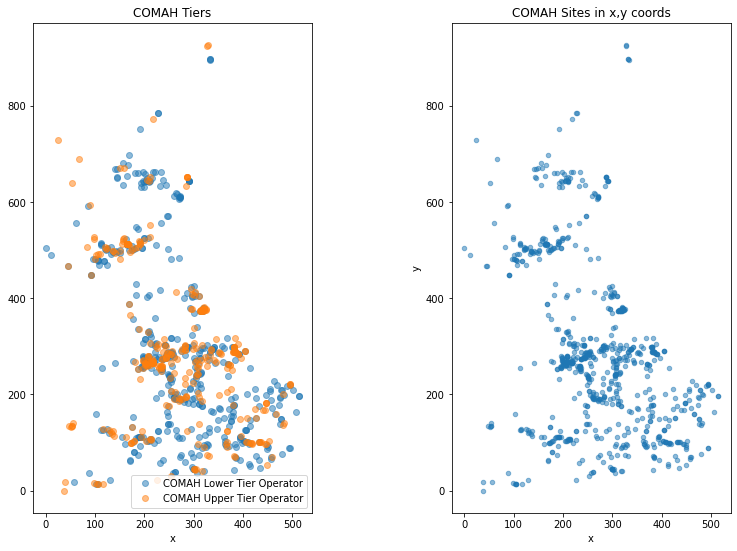

In [477]:
fig,ax = plt.subplots(1,2,figsize=(x_size,y_size))
for n,g in df_plotting.groupby('COMAH type'):
    g.plot(marker='o',linestyle='',alpha=0.5,x='x',y='y',label=n,ax=ax[0])
ax[0].legend()
ax[0].set_title('COMAH Tiers')
df_r_n.plot(kind='scatter',x='x',y='y',figsize=(x_size*2.5,y_size),alpha=0.5,title='COMAH Sites in x,y coords',ax=ax[1])
plt.subplots_adjust(wspace=0.5)

In [4]:
! jupyter nbconvert --to html clustering_of_COMAH_sites.ipynb

[NbConvertApp] Converting notebook clustering_of_COMAH_sites.ipynb to html
[NbConvertApp] Writing 1306904 bytes to clustering_of_COMAH_sites.html
